### Definição de funções utilitárias para o movimento das rainhas

In [3]:
QUEEN_INDENTIFIER = 22

def horizontal_attack(first_position: tuple[int, int], second_position: tuple[int, int]):
    """
    Verifies if first_position's queen can attack the second_position's queen by comparing
    it's line coordinate (first tuple coordinate).
    """

    if first_position[0] == second_position[0]:
        return True

    return False

def diagonal_attack(first_position: tuple[int, int], second_position: tuple[int, int]):
    """
    Verifies if first_position's queen can attack the second_position's queen by comparing
    it's diagonal coordinates. The absolute value of the coordinates difference must be the
    same.
    """

    if abs(first_position[0] - second_position[0]) == abs(first_position[1] - second_position[1]):
        return True

    return False

### Definição da principal classe do projeto 'Board'

#### Esta classe implementa a criação do tabuleiro jogo, com as damas sendo aleatoriamente posicionadas. 

Todos os estados vizinhos:


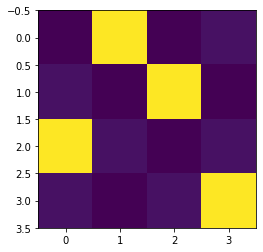

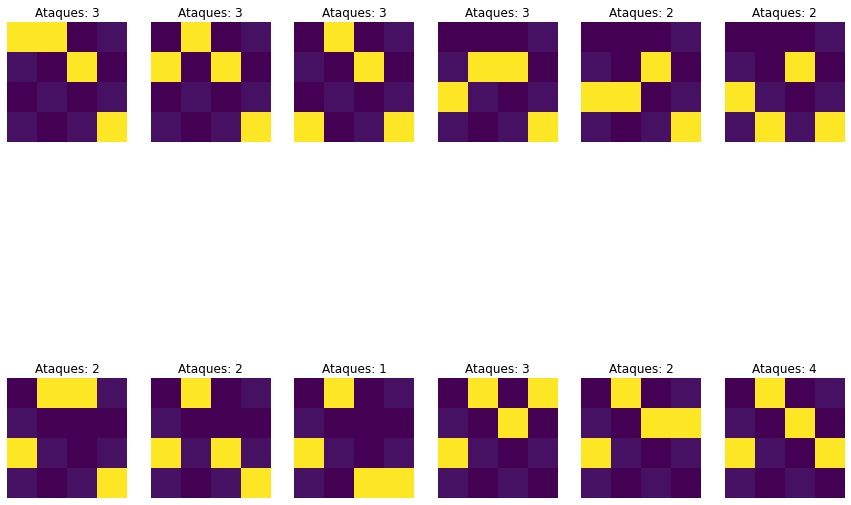

In [42]:
from matplotlib.style import available
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from typing import Tuple
from copy import copy

QUEEN_INDENTIFIER = 22

class Board():
    def __init__(self, N, game_board=None) -> None:
        self.first_coordinate = N
        self.second_coordinate = N
        if game_board is None:
            self.game_board = self.builder()
        else:
            self.game_board = game_board

    def builder(self) -> np.array:
        game_board = np.zeros((self.first_coordinate, self.second_coordinate))
        game_board[1::2, 0::2] = 1
        game_board[0::2, 1::2] = 1
        
        return game_board

    def queens_generator(self) -> np.array:
        for j in range(len(self.game_board)):
            queens_row = randint(0, len(self.game_board) - 1)
            queens_column = j
            self.game_board[queens_row, queens_column] = QUEEN_INDENTIFIER # this integer number gives the distinct color

        plt.imshow(self.game_board)

        """ Uma simples aritmetica com o resultado de argwhere ja nos nada o resultado das rainhas que sao encontradas por determinada rainha.
            Podemos por exemplo olhar sempre para a próxima rainha e ver se ela se encaixa em 1 de 3 casos em relação a rainha base: estar na
            mesma linha, estar na diagonal superior ou estar na diagonal inferior. Para a diagonal seria interessante ver se a diferenca de
            coordenadas em x e y eh igual, ou seja, subiu (ou desceu) 2 e 2 em relacao a posicao inical."""

        return

    def queens_attacks(self) -> int:
        queens_positions = np.argwhere(self.game_board == QUEEN_INDENTIFIER).tolist()
        queens_positions = sorted(queens_positions, key=lambda position: position[1])
        #print(queens_positions)

        number_of_attacks = 0

        for i in range(len(queens_positions) - 1):
            for j in range(i + 1, len(queens_positions)):
                if (horizontal_attack(queens_positions[i], queens_positions[j]) or
                    diagonal_attack(queens_positions[i], queens_positions[j])):
                    
                    #print(f"{queens_positions[i]} ataca {queens_positions[j]}")
                    number_of_attacks += 1
        
        #print(f"Numero de ataques nesse tabuleiro {number_of_attacks}")

        return number_of_attacks

    def all_neighbors(self) -> NotImplemented:
        queens_positions = np.argwhere(self.game_board == QUEEN_INDENTIFIER).tolist()
        queens_positions = sorted(queens_positions, key=lambda position: position[1])

        neighbors = []

        for position in queens_positions:
            original_row, original_column = position[0], position[1] 
            available_rows = [i for i in range(self.first_coordinate)
                              if i != original_row]


            for row in available_rows:
                new_game_board = copy(self.game_board)
                new_game_board[original_row, original_column] = 0
                new_game_board[row, original_column] = QUEEN_INDENTIFIER

                neighbors.append(Board(self.first_coordinate, new_game_board))

        return neighbors
            
def main():
    sizes = [int(element) for element in input("Enter the board's size: ").split()]
    board = Board(sizes[0])

    board.queens_generator()
    board.queens_attacks()
    neighbors = board.all_neighbors()
    
    fig = plt.figure(figsize=(15, 12))

    rows = 2
    columns = 6
    
    for i in range(1, len(neighbors) + 1):
        board = neighbors[i - 1]
        fig.add_subplot(rows, columns, i)
        plt.imshow(board.game_board)
        plt.axis('off')
        plt.title(f"Ataques: {board.queens_attacks()}")

if __name__ == '__main__':
    main()

### Definição da função que gera todos os vizinhos de um dado tabuleiro

In [77]:
from matplotlib.style import available
import numpy as np
from typing import List

def all_neighbors(board: Board) -> NotImplemented:
    queens_positions = np.argwhere(board.game_board == QUEEN_INDENTIFIER).tolist()
    queens_positions = sorted(queens_positions, key=lambda position: position[1])

    neighbors = []

    for position in queens_positions:
        current_row = position[0]
        available_rows = [i for i in range(board.first_coordinate) 
                          if i != current_row]
        
        for row in available_rows:
            new_board = board.game_board
            new_board[position[0], position[1]] = 0
            new_board[row, position[1]] = QUEEN_INDENTIFIER

            neighbors.append(new_board)

    print(len(neighbors))
    

    return

'Blue'